# Resolución de circuitos usando transformada de Laplace

**Importamos librería para cálculo simbólico**

In [1]:
import sympy as sy
sy.init_printing()

**Importamos librerías para gráficas y expresiones**

In [2]:
from IPython.display import Math, display
#import matplotlib.pyplot as plt
from sympy.plotting import plot
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')
%matplotlib inline

Creamos funciones para el cálculo de la transformada y antitransformada

In [3]:
def L(f):
    #return sy.laplace_transform(f, t, s, noconds=True)
    return sy.laplace_transform(f, t, s, legacy_matrix=False)

def iL(f):
    return sy.inverse_laplace_transform(f, s, t)

**Definimos variables y funciones**

In [4]:
s = sy.symbols('s')
t = sy.symbols('t', real=True, positive=True)
v, c, r = sy.symbols('v C R', real=True, positive=True)

In [5]:
#i = sy.Function('i')
vc = sy.Function('v_c')
Vc = sy.Function('V_c')

## Datos del circuito

In [6]:
datos = {
    # Valores de los componentes
    r : 10,  # Resistor
    c : sy.Rational(4, 1E6),  # Capacitor
    v : 80,  # Fuente de tensión
}   

## Condiciones iniciales

In [7]:
ics = {vc(0): 200}

## Ecuaciones de primeros principios

In [8]:
i = c * vc(t).diff(t)
vr = r * i
#display(v, vr, vl)

## Ecuación en el tiempo

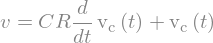

In [9]:
sy.Eq(v, vr + vc(t))

### Normalizamos

In [10]:
eq = (vr + vc(t)) - v  # igualamos a cero
eq = eq / (r*c)  # normalizamos
#eq

## Transformaciones al domínio de Laplace

### Ecuación en frecuencia compleja

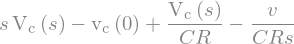

In [11]:
eq_lap = L(eq)[0].subs(sy.laplace_transform(vc(t), t, s),Vc(s))
eq_lap

In [12]:
eq_lap = sy.solve(eq_lap, Vc(s))[0]
display(Math(sy.latex(Vc(s)) + '=' + sy.latex(eq_lap)))

<IPython.core.display.Math object>

### Substitucion de condiciones iniciales

In [13]:
eq_lap = eq_lap.subs(ics)
display(Math(sy.latex(Vc(s)) + '=' + sy.latex(eq_lap)))

<IPython.core.display.Math object>

### Substitucion de valores y fuente

In [14]:
eq_lap = eq_lap.subs(datos)
display(Math(sy.latex(Vc(s)) + '=' + sy.latex(eq_lap)))

<IPython.core.display.Math object>

### Expansión en fracciones parciales

In [15]:
eq_lap = eq_lap.apart()
display(Math(sy.latex(Vc(s)) + '=' + sy.latex(eq_lap)))

<IPython.core.display.Math object>

## Antitransformada (ecuación en dominio temporal)

In [16]:
eq_t = iL(eq_lap)
eq_t

### Gráfica en el domínio temporal

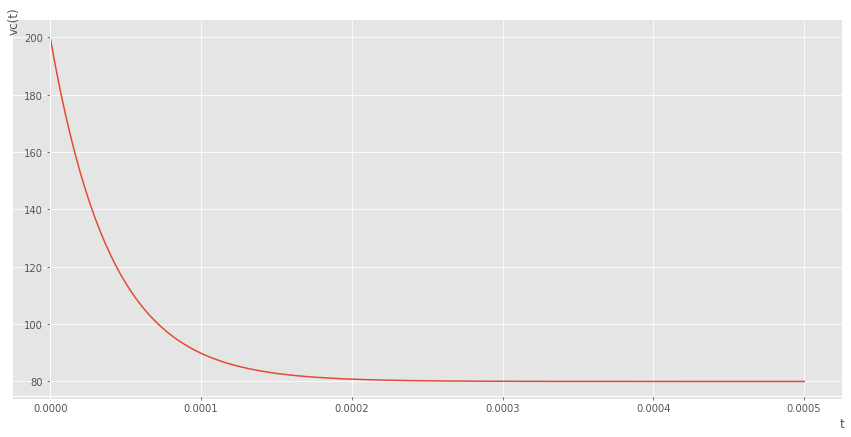

In [17]:
plt = plot(eq_t.evalf(), (t, 0, 0.0005), adaptive=False, size=[12,6], ylabel='vc(t)', axis_center=(0,75))